# **Import library and Mount drive**

In [1]:
!pip install pydub
!pip install xgboost

In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score

import lightgbm as lgb
import tensorflow as tf
from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

import librosa
import os
from pydub import AudioSegment
import librosa.display

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Extraction**

In [4]:
df5=pd.read_csv('/content/drive/MyDrive/Sound_Expression/features_extraction.csv')

In [5]:
df5.head()

,File,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_10989,Feature_10990,Feature_10991,Feature_10992,Feature_10993,Feature_10994,Feature_10995,Feature_10996,Feature_10997,Label
0,File_0,-894.628235,-894.628235,-894.628235,-894.628235,-894.628235,-894.628235,-894.628235,-894.628235,-894.628235,...,0.214977,-0.160975,-0.312369,-0.002868,0.289203,0.289203,0.289203,0.289203,0.289203,Neutral
1,File_1,-1068.115723,-1068.115723,-1068.115723,-1068.115723,-1068.115723,-1068.115723,-1068.115723,-1068.115723,-1068.115723,...,-0.039285,0.743088,1.056236,0.809565,0.541603,0.541603,0.541603,0.541603,0.541603,Calm
2,File_2,-890.555115,-890.555115,-890.555115,-890.555115,-890.555115,-890.555115,-890.555115,-890.555115,-890.555115,...,0.499987,0.216365,0.346787,0.421624,0.238669,0.238669,0.238669,0.238669,0.238669,Neutral
3,File_3,-1023.988403,-1023.988403,-1023.988403,-1023.988403,-1023.988403,-1023.988403,-1023.988403,-1023.988403,-1023.988403,...,-0.523052,-0.062958,0.022587,0.388317,1.085574,1.085574,1.085574,1.085574,1.085574,Calm
4,File_4,-1010.686584,-1010.686584,-1010.686584,-1010.686584,-1010.686584,-1010.686584,-1010.686584,-1010.686584,-1010.686584,...,-0.278640,-0.749013,-0.420844,0.157352,0.126219,0.126219,0.126219,0.126219,0.126219,Calm


# **Others Features we can considered when the model are not satisfy**

# Extract chroma features
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Extract spectral contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# Extract spectral centroid
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# Extract zero-crossing rate
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

# Extract root mean square energy
rms = librosa.feature.rms(y=y)

# Extract mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)


In [ ]:
# # Load audio file
# y, sr = librosa.load('your_audio_file.wav', sr=None)

# # Extract MFCCs
# mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# # Extract delta and delta-delta coefficients
# mfcc_delta = librosa.feature.delta(mfcc)
# mfcc_delta2 = librosa.feature.delta(mfcc, order=2)

# # Extract chroma features
# chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# # Extract spectral contrast
# spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# # Extract spectral centroid
# spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

# # Extract zero-crossing rate
# zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

# # Extract root mean square energy
# rms = librosa.feature.rms(y=y)

# # Extract mel spectrogram
# mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

# # Combine all features
# features = np.concatenate((mfcc, mfcc_delta, mfcc_delta2, chroma, spectral_contrast,
#                            spectral_centroid, zero_crossing_rate, rms, mel_spectrogram), axis=0)

# # Shape of features
# print("Shape of combined features: ", features.shape)

# **Split data frame to smaller data (X,y)**

In [6]:
X=df5.iloc[:,1:-1]
y=df5.iloc[:,-1]

In [7]:
# Encode string class values as integers to avoid errors in newer versions of XGBoost
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
y = label_encoder.transform(y)

In [8]:
X=np.array(X)
y=np.array(y)

In [9]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=104,
                                   test_size=0.25,
                                   shuffle=True)

In [10]:
print(X.shape)
print(y.shape)
print(X[1,-1])

(1440, 10998)
(1440,)
0.5416028499603271


## **Using XGBoost**

In [11]:
# Create the DMatrix for training and testing
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [12]:
params = {
    'objective': 'multi:softprob',
    'max_depth': 13,
    'learning_rate': 0.1,
    'eta': 0.3,
    'eval_metric': 'logloss',
    'num_class':8
}

In [23]:
# Train the model
bst = xgb.train(params, dtrain, num_boost_round=500, )

In [24]:
# Make predictions
y_pred_prob = bst.predict(dtest)
y_pred = [int(np.argmax(line)) for line in y_pred_prob]  # Convert probabilities to class predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.49


In [25]:
# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='macro')  # Use 'micro' or 'weighted' as needed
recall = recall_score(y_test, y_pred, average='macro')        # Use 'micro' or 'weighted' as needed

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Precision: 0.49
Recall: 0.49


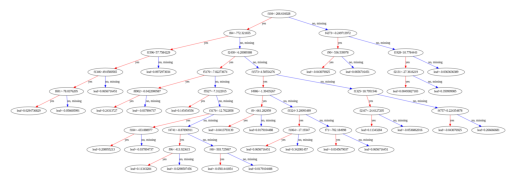

In [26]:
xgb.plot_tree(bst, num_trees=0)
plt.show()

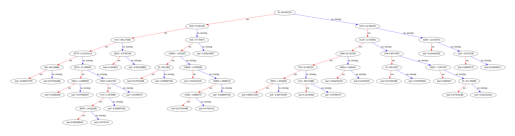

In [27]:
xgb.plot_tree(bst, num_trees=1)
plt.show()